# Titanic - Kaggle Challenge

Author: Ramy Ghorayeb
Date: October 12th 2018

## Exploration

### Exploration Visuelle

Loading

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
train = pd.read_csv("data/train.csv")

Cleaning

In [14]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Exploration General

In [5]:
fig = plt.figure(figsize=(15,6))

<Figure size 1080x432 with 0 Axes>

Plot in a grid of (2,3), ax1 is at (0,0)

Text(0.5,1,'Ax3\nDistribution of Classes')

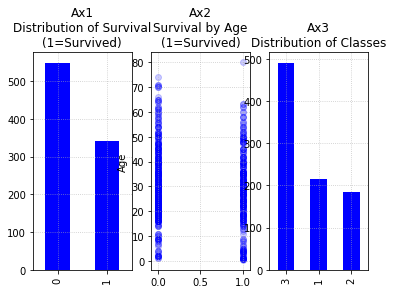

In [89]:
ax1 = plt.subplot2grid((1,3),(0,0))
train.Survived.value_counts().plot(kind='bar', color='blue', ax=ax1)
plt.grid(linestyle=':',alpha=0.75)
plt.title("Ax1\nDistribution of Survival\n(1=Survived)")

ax2 = plt.subplot2grid((1,3),(0,1))
plt.scatter(train.Survived, train.Age, alpha = 0.2, color='blue') #alpha = transparence
plt.ylabel("Age")
plt.grid(linestyle=':', alpha=0.75)
plt.title("Ax2\nSurvival by Age\n(1=Survived)")

ax3 = plt.subplot2grid((1,3),(0,2))
train.Pclass.value_counts().plot(kind='bar', color='blue', ax=ax3)
plt.grid(linestyle=':',alpha=0.75)
plt.title("Ax3\nDistribution of Classes")

Text(0.5,1,'Ax4\nAge distribution within classes')

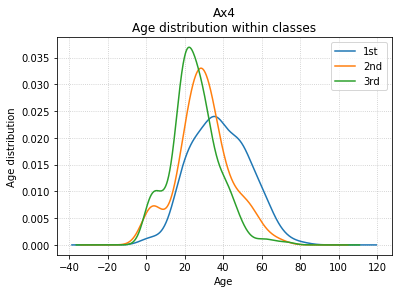

In [82]:
ax4 = plt.subplot2grid((1,1),(0,0))
for i in range(len(train.Pclass.value_counts())): #train.nunique() works too
    train.Age[train.Pclass==i+1].plot(kind='kde',ax=ax4)
plt.xlabel('Age')
plt.ylabel('Age distribution')
plt.legend(('1st','2nd','3rd'))
plt.grid(linestyle=':',alpha=0.75)
plt.title("Ax4\nAge distribution within classes")

Text(0.5,1,'Ax5\nPassengers per boarding location')

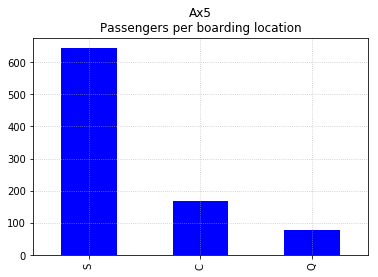

In [83]:
ax5 = plt.subplot2grid((1,1),(0,0))
train.Embarked.value_counts().plot(kind='bar',color='blue')
plt.grid(linestyle=':', alpha=0.75)
plt.title('Ax5\nPassengers per boarding location')

### Exploration Generale

Sex exploration

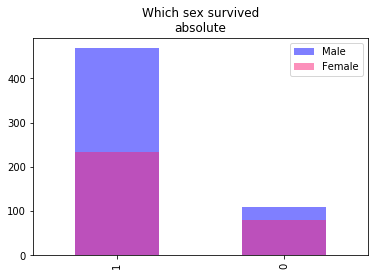

In [84]:
male_surv = train.Survived[train.Sex == 'male'].value_counts()
female_surv = train.Survived[train.Sex == 'female'].value_counts()

male_surv.plot(kind='bar', label='Male', color='blue', alpha=0.5)
female_surv.plot(kind='bar', label='Female', color='#FA2379', alpha=0.5)
plt.title('Which sex survived\nabsolute')
plt.legend()

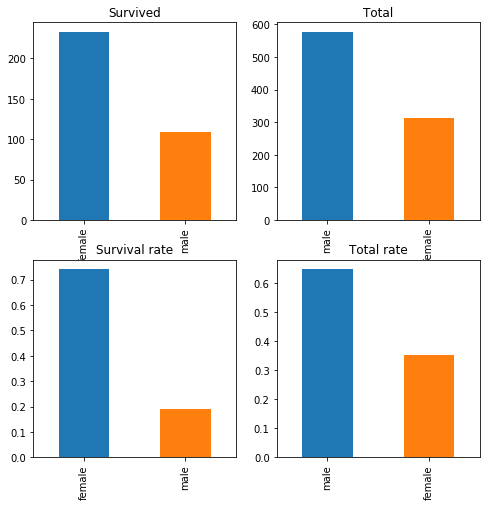

In [100]:
fig_survival = plt.figure(figsize=(8,8))

ax1= fig_survival.add_subplot(221)
ax2= fig_survival.add_subplot(222)
ax3= fig_survival.add_subplot(223)
ax4= fig_survival.add_subplot(224)

ax1.set_title("Survived")
train.Sex[train.Survived==1].value_counts() .plot(kind='bar',ax=ax1)

ax2.set_title("Total")
train.Sex.value_counts() .plot(kind='bar',ax=ax2)

ax3.set_title("Survival rate")
(train.Sex[train.Survived==1].value_counts()/train.Sex.value_counts()) .plot(kind='bar', ax=ax3)

ax4.set_title("Total rate")
(train.Sex.value_counts()/train.Sex.count()) .plot(kind='bar',ax=ax4)

Exploration multiple

In [112]:
for sex in ['male','female']:
    for i in range(3):
        print(sex,' in class',i)
        print('--21',(train.Age[train.Survived==1][train.Age<=21][train.Sex==sex][train.Pclass == i+1].value_counts()/train.Age[train.Age<=21][train.Pclass == i+1].value_counts()).mean())
        print('21-60',(train.Age[train.Survived==1][train.Age>21][train.Age<60][train.Sex==sex][train.Pclass == i+1].value_counts()/train.Age[train.Age<=21][train.Pclass == i+1].value_counts()).mean())
        print('60--',(train.Age[train.Survived==1][train.Age>=60][train.Sex==sex][train.Pclass == i+1].value_counts()/train.Age[train.Age>=60][train.Pclass == i+1].value_counts()).mean())

male  in class 0
--21 0.8333333333333334
21-60 nan
60-- 0.6666666666666666
male  in class 1
--21 0.6904761904761906
21-60 nan
60-- 1.0
male  in class 2
--21 0.35296743697478994
21-60 nan
60-- nan
female  in class 0
--21 0.8119047619047618
21-60 nan
60-- 0.5555555555555555
female  in class 1
--21 0.7115384615384616
21-60 nan
60-- nan
female  in class 2
--21 0.4347904546433959
21-60 nan
60-- 1.0


## DATA ENGINEERING

Loading

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Fill NaN

In [16]:
def fill_feat(train):

    # Replace NaN
    
    train['Age'] = train['Age'].fillna(train['Age'].mean())
    train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
    train['Embarked'] = train['Embarked'].fillna(train['Embarked'].value_counts().index[0])
    
    return(train)

Add Features

In [17]:
def add_feat(train):
    
    train['familysize'] = train['SibSp'] + train['Parch']
    train.familysize[train.familysize>=4] = 4
    
    train['ticketgroupsize'] = train.groupby('Ticket')['Ticket'].transform('count')-1
    
    name_dict = {"Capt":      "officer",
                "Col":        "officer",
                "Major":      "officer",
                "Dr":         "officer",
                "Rev":        "officer",
                "Jonkheer":   "snob",
                "Don":        "snob",
                "Sir" :       "snob",
                "the Countess":"snob",
                "Dona":       "snob",
                "Lady" :      "snob",
                "Mme":        "married",
                "Ms":         "married",
                "Mrs" :       "married",
                "Miss" :      "single",
                "Mlle":       "single",
                "Mr" :        "man",
                "Master" :    "boy"
                }
    
    train['prefix'] = train['Name'].map(lambda name:name. split(',') [1].split('.') [0] .strip())
    train['prefix'] = train['prefix'].map(name_dict)
    
    return train

Drop & Dummies

In [18]:
def drop_feat(train):
    train = train.drop(['Cabin','SibSp','Parch','Name','Ticket','Sex','PassengerId'], axis=1)
    return train
    
def dum_feat(train):
    train = pd.get_dummies(train,drop_first=True)
    return train

Data engineering final

In [19]:
def data_engine(train):
    train = fill_feat(train)
    train = add_feat(train)
    train = drop_feat(train)
    train = dum_feat(train)
    return train

train = data_engine(train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Machine Learning

Set up

In [23]:
X = train.drop(['Survived'],axis=1)
y = train.Survived

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

my_forest = RandomForestClassifier()
my_forest = my_forest.fit(X,y)

In [25]:
from sklearn.metrics import mean_squared_error

print('Score:', my_forest.score(X,y))
print('RMSE:', mean_squared_error(y,my_forest.predict(X)))

Score: 0.9730639730639731
RMSE: 0.026936026936026935


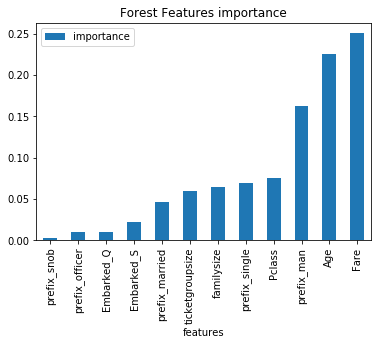

In [26]:
forest_viz = pd.DataFrame()
forest_viz['features'] = X.columns
forest_viz['importance'] = my_forest.feature_importances_
forest_viz = forest_viz.sort_values(by=['importance'])
forest_viz = forest_viz.set_index('features')
forest_viz.plot(kind='bar',title='Forest Features importance')

### Random Forest (hyperparameters tuned)

In [27]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
'n_estimators': range(1,50),
'max_features': range(1,X.columns.size),
'max_depth': range(1,20),
'min_samples_split': range(2,20),
'min_samples_leaf':range(2,20),
}

my_forest_cv = RandomizedSearchCV(my_forest, param_dist, n_jobs=2,cv=5)
my_forest_cv = my_forest_cv.fit(X,y)

In [28]:
print("score of the tuned forest: ", my_forest_cv.score(X,y))
print("RMSE: ", mean_squared_error(y,my_forest_cv.predict(X)),'\n')
print("Best parameters: ", my_forest_cv.best_params_,'\n')

score of the tuned forest:  0.8866442199775533
RMSE:  0.11335578002244669 

Best parameters:  {'n_estimators': 38, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 7, 'max_depth': 9} 



### XGboost

Vanilla algorithm

In [29]:
import xgboost as xgb

my_boost = xgb.XGBClassifier()
my_boost = my_boost.fit(X,y)

In [30]:
print("score of the xgboost: ", my_boost.score(X,y))
print("RMSE: ", mean_squared_error(y,my_boost.predict(X)))

score of the xgboost:  0.8855218855218855
RMSE:  0.11447811447811448


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Hyperparameters tuned

In [31]:
boost_param_dist = {
'max_depth' : [7, 8, 9],
'max_delta_step': [1],
'n_estimators': [20, 40, 60, 80],
'colsample_bylevel': [0.8, 0.9, 1.0],
'colsample_bytree': [0.6, 0.8, 1.0],
'subsample': [0.3, 0.4, 0.5, 0.6],
}

my_boost_cv = RandomizedSearchCV(my_boost, boost_param_dist, n_jobs=2,cv=5)
my_boost_cv = my_boost_cv.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

In [32]:
print("score of the tuned forest: ", my_boost_cv.score(X,y))
print("RMSE: ", mean_squared_error(y,my_boost_cv.predict(X)),'\n')
print("Best parameters: ", my_boost_cv.best_params_,'\n')

score of the tuned forest:  0.9001122334455668
RMSE:  0.09988776655443322 

Best parameters:  {'subsample': 0.4, 'n_estimators': 60, 'max_depth': 9, 'max_delta_step': 1, 'colsample_bytree': 1.0, 'colsample_bylevel': 1.0} 



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
